<center>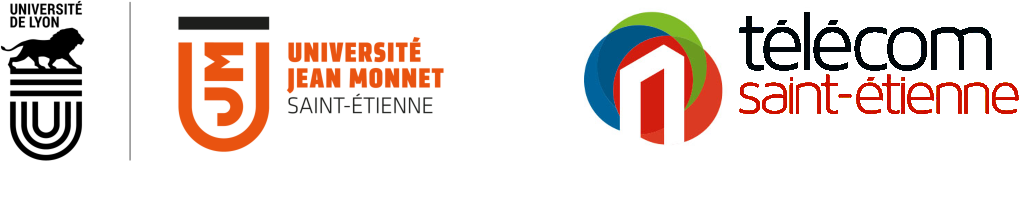</center>

<br>
<center><span style="font-size:35px"><b>Algorithms for Data Analysis</b></span></center>

<center><span style="font-size:25px"><b>Lab 2: ML for non ML Practionners | Diamonds Market</b></span></center>

Your passion for diamonds has driven you to establish a cutting-edge startup in the heart of the gemstone market. Your vision is clear — revolutionize the diamond trading industry with innovation and data-driven insights. As the founder of this dynamic venture, you recognize the pivotal role that advanced analytics and machine learning can play in understanding the intricate nuances of diamond prices. In your pursuit to reshape the industry, you asked your machine learning engineers to predict the price of diamonds from different attributes such as the weight of the diamond (carat), the quality of the cut, the color, clarity, etc.<br>
However, you have barely started to study machine learning yourself! Nonetheless, you have a solid background in statistics and programming. Equipped with your kwowledge, you decide  to verify if the machine learning engineers in your team have done a good job.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Exploratory Data Analysis

Your data engineers have collected and clean data about diamonds. Their work is summed up in the `diamonds_market.csv` file.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Use the Panda library to load the dataset into a Pandas serie called ``data``. Then, display the data.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Provide descriptive statistics of the data.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Extract the carats and the prices of all diamonds into 2 numpy arrays called `X` and `y`, respectively. Display the price as a function of the carat. Comment.

# 2. Model Building

Your machine learning engineers think that the best way to predict the price of a diamond from the carat is by using a linear relationship. They have learned such linear model and found the optimal parameters to be: coefficient (*fr: coefficient directeur*) 8752 and intercept (*fr: ordonnée à l'origine*) -3264.

## 2.1. Examining your ML engineers solution

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Create the function `f_engineers` corresponding to the model learned by the engineer. It should take as input any carat value and output the predicted price. Implement it in two ways. First using `def`. Second using *lambda expressions*. When should you prefer the second?

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Print the predicted price and actual price of the first 5 diamonds. Comment.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Plot the predicted value of all diamonds ranging from the lowest to the largest carat. Use `np.linspace` to create the range of carat's values.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** The data point don’t fall exactly on this regression equation line; they are scattered around. A residual is the vertical distance between a data point $y_i$ and its predicted value $f(X_i)$ by the model $f$ (i.e. the regression line). Each data point has one residual. They are:
- Positive if they are above the regression line,
- Negative if they are below the regression line,
- Zero if the regression line actually passes through the point.

Compute and plot the histogram of residuals. Comment.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Test if the residuals follow a normal distribution, that is if for each sample $(y_i,X_i)$
 
\begin{equation}\text{residual}_i=y_i-f(X_i) \sim \mathcal{N}(0,\sigma^2)\quad\text{for some unknown variance } \sigma^2
\end{equation}
 



## 2.2. Link between statistics and machine learning

We have previously seen that, given the model $f$, the joint probability of observing $(y_i,X_i)$ is given by the probability distribution function $\mathcal{N}(y_i|f(X_i),\sigma^2)$, that is

\begin{equation}P(y_i,X_i|f)=\frac{1}{\sigma\sqrt{2\pi}}\mathrm{e}^{-\frac{1}{2}\left(\frac{( y_i - f(X_i))}{\sigma}\right)^2}\end{equation}


Since all samples are independents, we also have that 

\begin{equation}P(y,X|f) = \prod_{i=1}^n P(y_i,X_i|f)\end{equation}

In machine learning, we are more interested in viewing $P(y,X|f)$ as a function of the model $f$ rather than the data $(y,X)$. To this purpose, the function $f\mapsto P(y,X|f)$ is called the **likelihood function** and is often written as **$L(f| y,X)$**.

In other words, the likelihood function is the joint probability of observed data viewed as a function of the parameters of a statistical model

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Write the expression of $L(f|y,X)$.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Finding the model $f$ which best explains the data amounts in maximizing the likelihood function $L(f|y,X)$, or equivalently its logarithm. Show that maximizing $\log L(f|y,X)$ with respect to $f$ is equivalent to minimizing the mean squared error $\|y-f(X)\|_2^2=\frac{1}{n}\sum_{i=1}^n (y_i - f(X_i))^2$.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** What is the value of the mean squared error?

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Is the MSE large? Compare with respect to your data. Comment.

## 2.3. Checking the optimality of their solution

Since you don't know yet how to select the optimal hypothesis from the hypothesis space, you investigate a brute force approach: you perform a grid-search strategy to find the best hypothesis.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** What is the hypothesis space?

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Implement a function `hypothesis` which return one hypothesis from the hypothesis space from the vector $w\in\mathbb{R}^2$ made of the intercept and coefficient.

<i class="fa fa-gear fa-spin fa-1x"></i> **EXERCISE.** Generate 100 hypotheses by considering all combinations in which $w[0]$ is chosen from the discretized range $[-4000, -2000]$ and $w[1]$ is chosen from the discretized range $[8000, 9000]$. This involves creating a grid with 10 values for each parameter, resulting in a total of 100 combinations within the specified ranges. Store the MSE error of each hypothesis in a 2D array `error_all` of size 10 by 10.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Display the prediction errors with a 2D heatmap by using `imshow`. Comment. Also display in 3D.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** What is the minimum value of the error? Compare with the error obtained by your ML engineers.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** We now would like the index in the array `error_all` where the minimum is located. It is the *argument of the minimum* shortened as *argmin*. Use the corresponding function in numpy.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Unfortunately, it returns the index of the minimum argument by ravelling all the matrix into a 1D vector. To unravel the indices and find the indices (`min_i`, `min_j`), use the function `np.unravel_index`.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Display the corresponding optimal value of `w`. Comment.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** What can you conclude about the job done by your ML engineers?